In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
with open('/content/drive/MyDrive/PetImages/y_val.txt', 'r') as f:
    y_val = np.loadtxt(f)
print(y_val)
print(type(y_val))

[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.

In [27]:
with open('/content/drive/MyDrive/PetImages/y_test.txt', 'r') as f:
    y_test = np.loadtxt(f)
with open('/content/drive/MyDrive/PetImages/y_train.txt', 'r') as f:
    y_train = np.loadtxt(f)

In [28]:
print(len(y_train))

4000


In [29]:
X_test = np.load('/content/drive/MyDrive/PetImages/X_test.npy')

In [30]:
print(X_test.shape)

(500, 160, 160, 3)


In [31]:
print(X_test[5,0,0,0])

0.8627450980392157


In [32]:
print((X_test[5]))

[[[0.8627451  0.83921569 0.84313725]
  [0.85882353 0.83529412 0.83921569]
  [0.86666667 0.84313725 0.84705882]
  ...
  [0.01568627 0.01960784 0.01176471]
  [0.02352941 0.02745098 0.01960784]
  [0.01176471 0.00784314 0.01568627]]

 [[0.86666667 0.84313725 0.84705882]
  [0.8627451  0.83921569 0.84313725]
  [0.8627451  0.83921569 0.84313725]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00392157 0.01176471]]

 [[0.86666667 0.84313725 0.84705882]
  [0.8627451  0.84313725 0.84705882]
  [0.85490196 0.83137255 0.83529412]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.01176471 0.01176471 0.01176471]
  [0.00784314 0.00392157 0.01176471]]

 ...

 [[0.24313725 0.29019608 0.29803922]
  [0.24705882 0.29411765 0.30196078]
  [0.25882353 0.30588235 0.30980392]
  ...
  [0.19215686 0.25490196 0.25098039]
  [0.2        0.2627451  0.25882353]
  [0.19607843 0.25098039 0.24705882]]

 [[0.24705882 0.29803922 0.30588235]
  [0.24313725 0.29411765 0.30196078]


In [33]:
X_train = np.load('/content/drive/MyDrive/PetImages/X_train.npy')
X_val = np.load('/content/drive/MyDrive/PetImages/X_val.npy')

In [34]:
print(X_train.size)

307200000


In [35]:
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [12]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
125/125 [==============================] - 11s 78ms/step - loss: 1.8065 - accuracy: 0.5268 - val_loss: 0.7153 - val_accuracy: 0.5440
Epoch 2/20
125/125 [==============================] - 9s 74ms/step - loss: 0.7666 - accuracy: 0.5590 - val_loss: 0.7176 - val_accuracy: 0.5560
Epoch 3/20
125/125 [==============================] - 9s 76ms/step - loss: 0.7589 - accuracy: 0.5408 - val_loss: 1.2225 - val_accuracy: 0.5300
Epoch 4/20
125/125 [==============================] - 9s 74ms/step - loss: 0.7581 - accuracy: 0.5555 - val_loss: 0.7645 - val_accuracy: 0.5300
Epoch 5/20
125/125 [==============================] - 11s 86ms/step - loss: 0.6866 - accuracy: 0.5810 - val_loss: 0.8043 - val_accuracy: 0.5340
Epoch 6/20
125/125 [==============================] - 9s 73ms/step - loss: 0.6911 - accuracy: 0.5785 - val_loss: 0.6934 - val_accuracy: 0.5620
Epoch 7/20
125/125 [==============================] - 9s 73ms/step - loss: 0.6892 - accuracy: 0.5893 - val_loss: 0.8414 - val_accuracy: 0.51

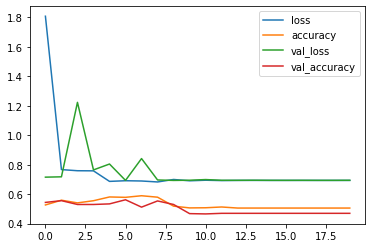

In [13]:
lossData = pd.DataFrame(model.history.history)
lossData.plot()

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [37]:
X_train.shape

(4000, 160, 160, 3)

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(x=X_train, y=y_train, epochs=20, batch_size=25, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
160/160 [==============================] - 317s 2s/step - loss: 0.6895 - accuracy: 0.5390 - val_loss: 0.6828 - val_accuracy: 0.5560
Epoch 2/20
160/160 [==============================] - 317s 2s/step - loss: 0.6847 - accuracy: 0.5487 - val_loss: 0.6969 - val_accuracy: 0.5080
Epoch 3/20
160/160 [==============================] - 319s 2s/step - loss: 0.6822 - accuracy: 0.5523 - val_loss: 0.7058 - val_accuracy: 0.4700
Epoch 4/20
160/160 [==============================] - 316s 2s/step - loss: 0.6805 - accuracy: 0.5510 - val_loss: 0.6618 - val_accuracy: 0.6140
Epoch 5/20
160/160 [==============================] - 318s 2s/step - loss: 0.6618 - accuracy: 0.5888 - val_loss: 0.6424 - val_accuracy: 0.6540
Epoch 6/20
160/160 [==============================] - 316s 2s/step - loss: 0.6381 - accuracy: 0.6265 - val_loss: 0.6277 - val_accuracy: 0.6480
Epoch 7/20
160/160 [==============================] - 317s 2s/step - loss: 0.6127 - accuracy: 0.6555 - val_loss: 0.6381 - val_accuracy: 0.6140

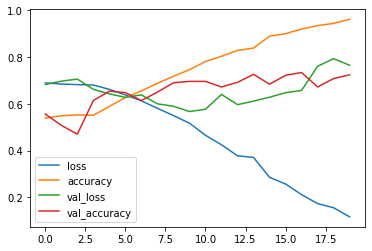

In [ ]:
lossData = pd.DataFrame(model2.history.history)
lossData.plot()

In [ ]:
model3 = Sequential()
model3.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
125/125 [==============================] - 344s 3s/step - loss: 0.6871 - accuracy: 0.5770 - val_loss: 0.6575 - val_accuracy: 0.5620
Epoch 2/10
125/125 [==============================] - 338s 3s/step - loss: 0.6127 - accuracy: 0.6690 - val_loss: 0.6190 - val_accuracy: 0.6360
Epoch 3/10
125/125 [==============================] - 360s 3s/step - loss: 0.5778 - accuracy: 0.7045 - val_loss: 0.5824 - val_accuracy: 0.7060
Epoch 4/10
125/125 [==============================] - 334s 3s/step - loss: 0.5495 - accuracy: 0.7320 - val_loss: 0.5889 - val_accuracy: 0.6960
Epoch 5/10
125/125 [==============================] - 331s 3s/step - loss: 0.5331 - accuracy: 0.7487 - val_loss: 0.5929 - val_accuracy: 0.6880
Epoch 6/10
125/125 [==============================] - 333s 3s/step - loss: 0.4986 - accuracy: 0.7635 - val_loss: 0.5441 - val_accuracy: 0.7400
Epoch 7/10
125/125 [==============================] - 329s 3s/step - loss: 0.4684 - accuracy: 0.7820 - val_loss: 0.5376 - val_accuracy: 0.7360

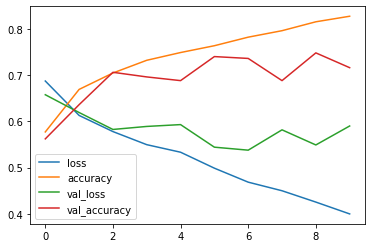

In [ ]:
lossData = pd.DataFrame(model3.history.history)
lossData.plot()

In [38]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [39]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,
    weights= "imagenet",
    input_shape = (160,160,3),
    pooling = "max"
)

In [40]:
for layer in base_model.layers:
  layer.trainable = False

In [41]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation="sigmoid")(x)
head_model = tf.keras.Model(
    inputs=base_model.inputs,
    outputs=predictions
)
head_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [42]:
history = head_model.fit(X_train, y_train,
                         batch_size=128,
                         epochs=25,
                         validation_data=(X_val, y_val))

Epoch 1/25
32/32 [==============================] - 68s 2s/step - loss: 0.8439 - accuracy: 0.7757 - val_loss: 0.1269 - val_accuracy: 0.9560
Epoch 2/25
32/32 [==============================] - 66s 2s/step - loss: 0.1443 - accuracy: 0.9420 - val_loss: 0.0959 - val_accuracy: 0.9620
Epoch 3/25
32/32 [==============================] - 66s 2s/step - loss: 0.1052 - accuracy: 0.9557 - val_loss: 0.0938 - val_accuracy: 0.9660
Epoch 4/25
32/32 [==============================] - 65s 2s/step - loss: 0.0880 - accuracy: 0.9628 - val_loss: 0.1225 - val_accuracy: 0.9560
Epoch 5/25
32/32 [==============================] - 67s 2s/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.1008 - val_accuracy: 0.9540
Epoch 6/25
32/32 [==============================] - 72s 2s/step - loss: 0.0742 - accuracy: 0.9703 - val_loss: 0.0810 - val_accuracy: 0.9640
Epoch 7/25
32/32 [==============================] - 76s 2s/step - loss: 0.0645 - accuracy: 0.9747 - val_loss: 0.1123 - val_accuracy: 0.9580
Epoch 8/25
32/32 [==

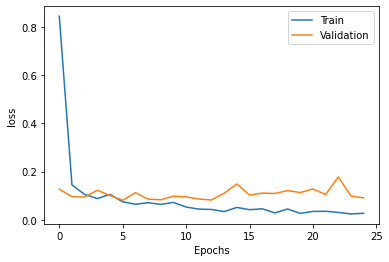

In [43]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

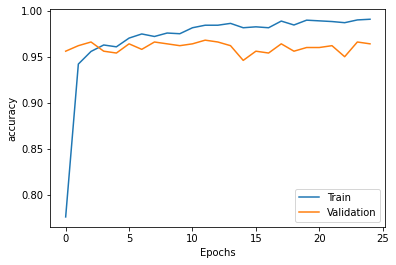

In [44]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()